In [31]:
import sklearn
from keras.datasets import mnist
import numpy as np
import tensorflow as tf


trainSize = 100
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X[:trainSize,:,:]
train_y = train_y[:trainSize]
test_X = test_X[:trainSize,:,:]
test_y = test_y[:trainSize]

ux= 28
uy =28

test_X= np.reshape(test_X,(trainSize,ux*uy))

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(ux, uy)),
  tf.keras.layers.Dense(128, activation='sigmoid'), tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(128, activation='sigmoid'), tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(10)
])

# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn = tf.keras.losses.MeanSquaredLogarithmicError()
# class Custom_CE_Loss(tf.keras.losses.Loss):
#     def __init__(self):
#         super().__init__()
#     def call(self, y_true, y_pred):
#         log_y_pred = tf.math.log(y_pred)
#         elements = -tf.math.multiply_no_nan(x=log_y_pred, y=y_true)
#         return tf.reduce_mean(tf.reduce_sum(elements,axis=1))
# loss_fn = Custom_CE_Loss()
#
# def loss_fnL(y_true,y_pred):
#     return tf.reduce_mean(tf.square(y_true-y_pred))



model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(train_X, train_y, epochs=5)

model.evaluate(train_X,  train_y, verbose=2)
model.evaluate(test_X,  test_y, verbose=2)



Epoch 1/5
4/4 [==============================] - 1s 4ms/step - loss: 1.8772 - accuracy: 0.0900
Epoch 2/5
4/4 [==============================] - 0s 4ms/step - loss: 1.5840 - accuracy: 0.0800
Epoch 3/5
4/4 [==============================] - 0s 4ms/step - loss: 1.4695 - accuracy: 0.0800
Epoch 4/5
4/4 [==============================] - 0s 4ms/step - loss: 1.4178 - accuracy: 0.0800
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 1.3994 - accuracy: 0.1000
4/4 - 0s - loss: 1.3885 - accuracy: 0.0800 - 132ms/epoch - 33ms/step
4/4 - 0s - loss: 1.3491 - accuracy: 0.0200 - 139ms/epoch - 35ms/step


[1.349076271057129, 0.019999999552965164]

In [18]:

probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


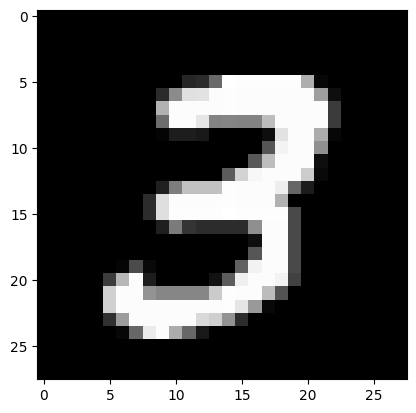

In [21]:
testNumber=7
testVec = np.reshape(train_X[testNumber], (1, 28,28))
print(probability_model(testVec))
import matplotlib.pyplot as plt
plt.imshow(testVec[0], cmap=plt.cm.gray)